In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker, cm
from matplotlib.ticker import FormatStrFormatter

height, tip_radius, hb_ratio, field_amp = np.loadtxt('tip-height-slope/max_field_vals.txt', unpack=True)

print(np.unique(height))
print(np.unique(tip_radius))
print(np.unique(hb_ratio))

[   1.    2.    4.    6.    8.   10.   20.   40.   60.   80.  100.  200.
  400.  600.  800. 1000.]
[ 10.  20.  40.  60.  80. 100.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [99]:
amplifying_indices = np.where(field_amp > 3.75)

for k in amplifying_indices[0]:
    print(int(round(height[k])), int(round(tip_radius[k])), int(round(hb_ratio[k])), field_amp[k])

200 10 10 3.756221328628287
400 10 4 3.7836427166394593
400 10 5 3.8534396592449696
400 10 6 3.90262561236052
400 10 7 3.9380607479269827
400 10 8 3.9667274133740773
400 10 9 3.989215118194236
400 10 10 4.007869608822819
400 20 10 3.756363294672394
600 10 3 3.8019533705945694
600 10 4 3.919092618076117
600 10 5 3.992329217264508
600 10 6 4.043754538958547
600 10 7 4.0813654905099
600 10 8 4.111312719799348
600 10 9 4.135238659613571
600 10 10 4.154536925777987
600 20 5 3.7550751509533082
600 20 6 3.802189776416248
600 20 7 3.8365592437357523
600 20 8 3.863757182160889
600 20 9 3.8850718591826507
600 20 10 3.903782604682985
800 10 3 3.894321209275316
800 10 4 4.015178835253681
800 10 5 4.090917854779473
800 10 6 4.144173288426406
800 10 7 4.183796395138194
800 10 8 4.214077570961782
800 10 9 4.238827258965969
800 10 10 4.259258929522189
800 20 4 3.783913089440218
800 20 5 3.852818572239606
800 20 6 3.902516436950031
800 20 7 3.938879400623054
800 20 8 3.9656518924029
800 20 9 3.98918487

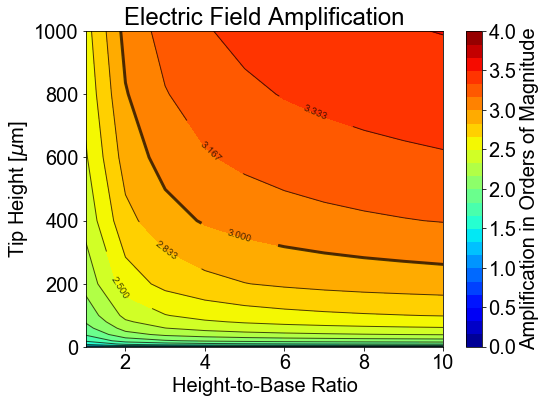

In [24]:
# plt.rcParams['font.size'] = 14
# plt.rcParams['font.family'] = 'serif'
# fig = plt.figure(figsize=(6, 5))

plt.rcParams['font.size'] = 20
plt.rcParams['font.sans-serif'] = ['Arial']
fig = plt.figure(figsize=(8, 6))

this_tip_radius = 100

indices_of_fixed_tip_radius = np.where(tip_radius == this_tip_radius)

heights_at_fixed_tip_radius = np.unique(height[indices_of_fixed_tip_radius])
hb_ratios_at_fixed_tip_radius = np.unique(hb_ratio[indices_of_fixed_tip_radius])
field_amps_at_fixed_tip_radius = field_amp[indices_of_fixed_tip_radius]

x, y = np.meshgrid(hb_ratios_at_fixed_tip_radius, heights_at_fixed_tip_radius)

plt.contourf(x, y, field_amps_at_fixed_tip_radius.reshape(16, 10), np.linspace(0, 4, 25), cmap=cm.jet)

CB = plt.colorbar()
CB.set_label('Amplification in Orders of Magnitude')

CS = plt.contour(x, y, field_amps_at_fixed_tip_radius.reshape(16, 10), np.linspace(0, 4, 25), colors='k', linewidths=(1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1), alpha=0.7)
manual_locations = [(2, 200), (3, 300), (5, 400), (4, 600), (7, 800)]
plt.clabel(CS, inline=True, inline_spacing = 25, fontsize=10, manual=manual_locations)

plt.xlabel('Height-to-Base Ratio')
plt.ylabel('Tip Height [$\mu$m]')

plt.title('Electric Field Amplification')

plt.tight_layout()
# plt.show()

plt.savefig('height_vs_hb_ratio_amp.pdf', bbox_inches='tight')

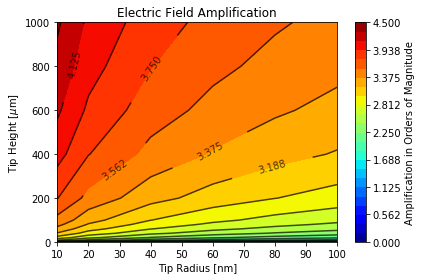

In [3]:
# plt.rcParams['font.size'] = 14
# plt.rcParams['font.family'] = 'serif'
# fig = plt.figure(figsize=(6, 5))

this_hb_ratio = 10

indices_of_fixed_hb_ratio = np.where(hb_ratio == this_hb_ratio)

heights_at_fixed_hb_ratio = np.unique(height[indices_of_fixed_hb_ratio])
tip_radii_at_fixed_hb_ratio = np.unique(tip_radius[indices_of_fixed_hb_ratio])
field_amps_at_fixed_hb_ratio = field_amp[indices_of_fixed_hb_ratio]

x, y = np.meshgrid(tip_radii_at_fixed_hb_ratio, heights_at_fixed_hb_ratio)

plt.contourf(x, y, field_amps_at_fixed_hb_ratio.reshape(16, 6), np.linspace(0, 4.5, 25), cmap=cm.jet)

CB = plt.colorbar()
CB.set_label('Amplification in Orders of Magnitude')

CS = plt.contour(x, y, field_amps_at_fixed_hb_ratio.reshape(16, 6), np.linspace(0, 4.5, 25), colors='k', alpha=0.7)
manual_locations = [(20, 800), (30, 300), (40, 800), (60, 400), (80, 300)]
plt.clabel(CS, inline=True, inline_spacing = 25, fontsize=10, manual=manual_locations)

plt.xlabel('Tip Radius [nm]')
plt.ylabel('Tip Height [$\mu$m]')
plt.title('Electric Field Amplification')

plt.tight_layout()
plt.show()

# plt.savefig('height_vs_tip_radius_amp.pdf', bbox_inches='tight')

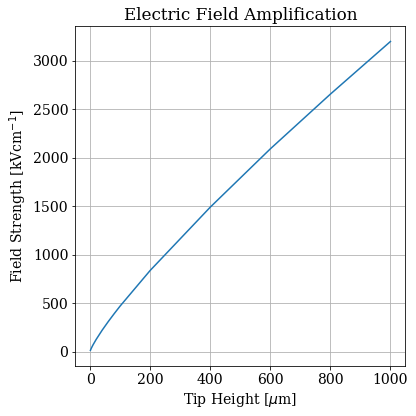

In [46]:
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'serif'
fig = plt.figure(figsize=(6, 6))

this_hb_ratio = 10
this_tip_radius = 100 # nm

indices_of_fixed_hb_ratio = np.where(hb_ratio == this_hb_ratio)

heights_at_fixed_hb_ratio = height[indices_of_fixed_hb_ratio]
tip_radii_at_fixed_hb_ratio = tip_radius[indices_of_fixed_hb_ratio]
field_amps_at_fixed_hb_ratio = field_amp[indices_of_fixed_hb_ratio]

indices_of_fixed_tip_radius = np.where(tip_radii_at_fixed_hb_ratio == this_tip_radius)[0]

final_heights = heights_at_fixed_hb_ratio[indices_of_fixed_tip_radius]
final_field_amps = field_amps_at_fixed_hb_ratio[indices_of_fixed_tip_radius]

plt.plot(final_heights, 10**final_field_amps)

plt.xlabel('Tip Height [$\mu$m]')
plt.ylabel('Field Strength [kVcm$^{-1}$]')
plt.title('Electric Field Amplification')

plt.grid()
plt.tight_layout()
# plt.show()

plt.savefig('height_vs_amp.pdf', bbox_inches='tight')

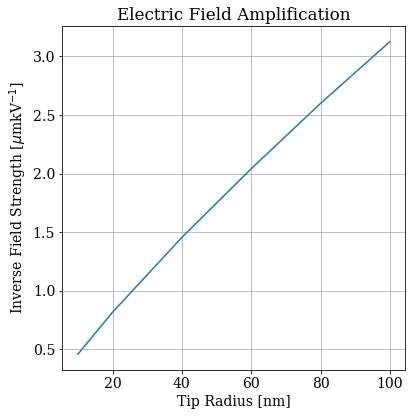

In [47]:
# plt.rcParams['font.size'] = 14
# plt.rcParams['font.family'] = 'serif'
# fig = plt.figure(figsize=(6, 6))

this_hb_ratio = 10
this_tip_height = 1000 # um

indices_of_fixed_hb_ratio = np.where(hb_ratio == this_hb_ratio)

heights_at_fixed_hb_ratio = height[indices_of_fixed_hb_ratio]
tip_radii_at_fixed_hb_ratio = tip_radius[indices_of_fixed_hb_ratio]
field_amps_at_fixed_hb_ratio = field_amp[indices_of_fixed_hb_ratio]

indices_of_fixed_tip_height = np.where(heights_at_fixed_hb_ratio == this_tip_height)[0]

final_radii = tip_radii_at_fixed_hb_ratio[indices_of_fixed_tip_height]
final_field_amps = 10**np.array(field_amps_at_fixed_hb_ratio[indices_of_fixed_tip_height])

plt.plot(final_radii, (final_field_amps**(-1))*1e4)

plt.xlabel('Tip Radius [nm]')
plt.ylabel('Inverse Field Strength [$\mu$mkV$^{-1}$]')
plt.title('Electric Field Amplification')

plt.grid()
plt.tight_layout()
plt.show()

# plt.savefig('radius_vs_inv_amp.pdf', bbox_inches='tight')

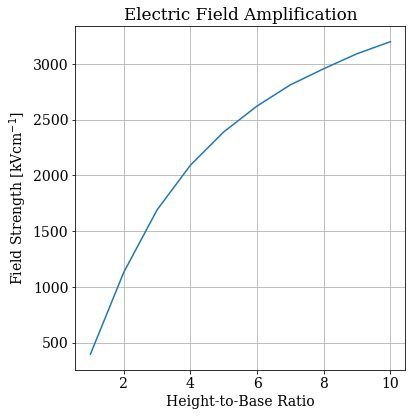

In [48]:
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'serif'
fig = plt.figure(figsize=(6, 6))

this_tip_radius = 100 # nm
this_tip_height = 1000 # um

indices_of_fixed_tip_radius = np.where(tip_radius == this_tip_radius)

heights_at_fixed_tip_radius = height[indices_of_fixed_tip_radius]
hb_ratio_at_fixed_tip_radius = hb_ratio[indices_of_fixed_tip_radius]
field_amps_at_fixed_tip_radius = field_amp[indices_of_fixed_tip_radius]

indices_of_fixed_tip_height = np.where(heights_at_fixed_tip_radius == this_tip_height)[0]

final_hb_ratio = hb_ratio_at_fixed_tip_radius[indices_of_fixed_tip_height]
final_field_amps = 10**np.array(field_amps_at_fixed_tip_radius[indices_of_fixed_tip_height])

plt.plot(final_hb_ratio, final_field_amps)

plt.xlabel('Height-to-Base Ratio')
plt.ylabel('Field Strength [kVcm$^{-1}$]')
plt.title('Electric Field Amplification')

plt.grid()
plt.tight_layout()
# plt.show()

plt.savefig('hb_ratio_vs_amp.pdf', bbox_inches='tight')

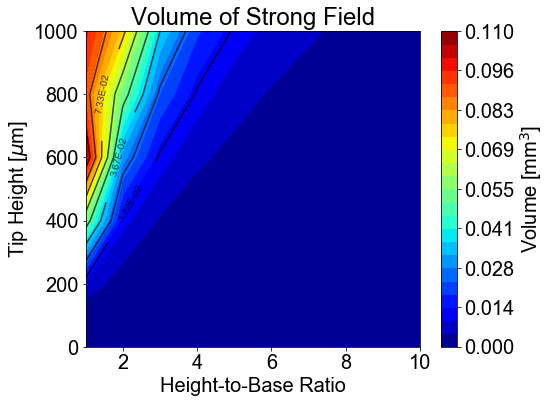

In [23]:
# plt.rcParams['font.size'] = 14
# plt.rcParams['font.family'] = 'serif'
# fig = plt.figure(figsize=(6, 5))

# plt.rcParams['font.size'] = 20
# plt.rcParams['font.sans-serif'] = ['Arial']
# fig = plt.figure(figsize=(8, 6))

this_tip_radius = 100

height, tip_radius, hb_ratio, vol = np.loadtxt('tip-height-slope/max_field_vols.txt', unpack=True)

indices_of_fixed_tip_radius = np.where(tip_radius == this_tip_radius)

heights_at_fixed_tip_radius = np.unique(height[indices_of_fixed_tip_radius])
hb_ratios_at_fixed_tip_radius = np.unique(hb_ratio[indices_of_fixed_tip_radius])
vols_at_fixed_tip_radius = vol[indices_of_fixed_tip_radius] * 1e9

x, y = np.meshgrid(hb_ratios_at_fixed_tip_radius, heights_at_fixed_tip_radius)

plt.contourf(x, y, vols_at_fixed_tip_radius.reshape(16, 10), np.linspace(1e-11, 1.1e-1, 25), cmap=cm.jet)

CB = plt.colorbar(format='%.3f')
CB.set_label('Volume [mm$^3$]')

CS = plt.contour(x, y, vols_at_fixed_tip_radius.reshape(16, 10), np.linspace(1e-11, 1.1e-1, 10), colors='k', alpha=0.7)
manual_locations = [(1.5, 800), (2, 600), (3, 400)]
plt.clabel(CS, inline=True, inline_spacing=25, fontsize=10, manual=manual_locations, fmt='%0.2E')

plt.xlabel('Height-to-Base Ratio')
plt.ylabel('Tip Height [$\mu$m]')
plt.title('Volume of Strong Field')

plt.tight_layout()
plt.show()

# plt.savefig('height_vs_hb_ratio_vol.pdf', bbox_inches='tight')

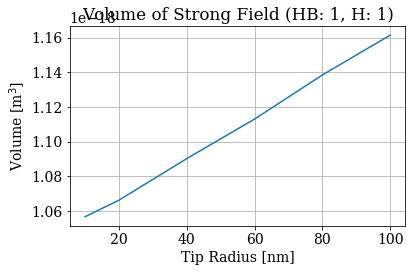

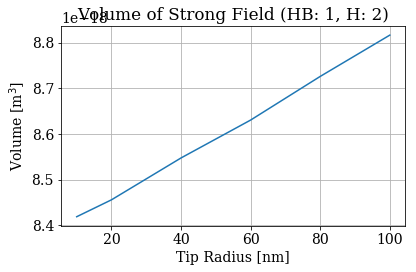

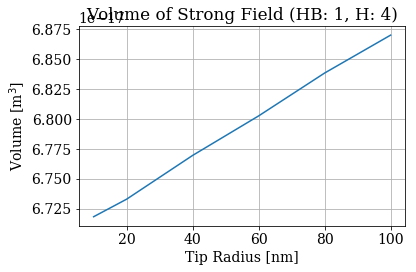

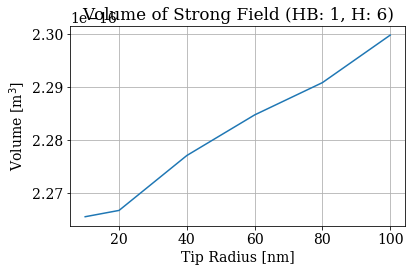

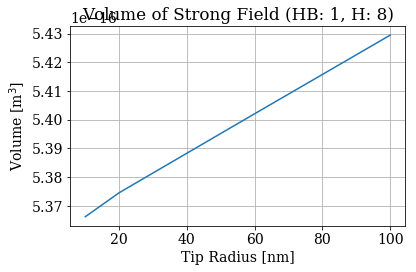

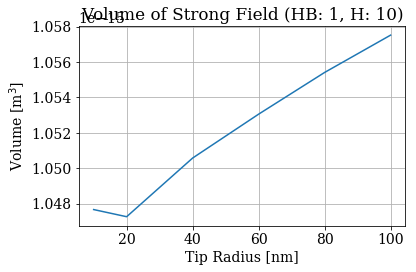

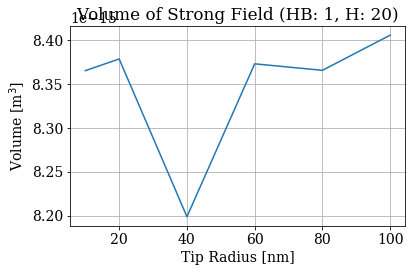

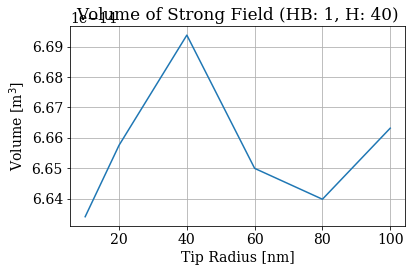

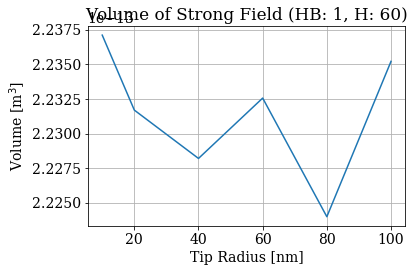

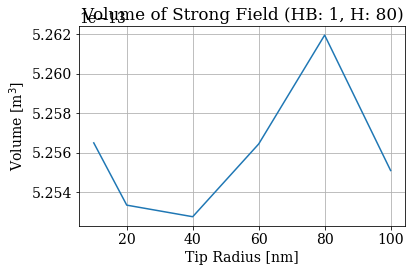

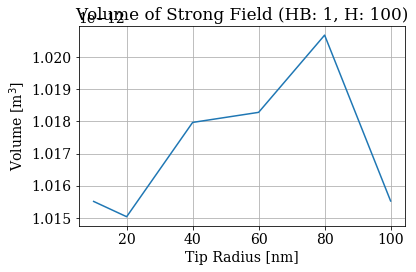

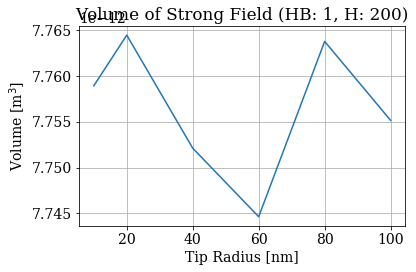

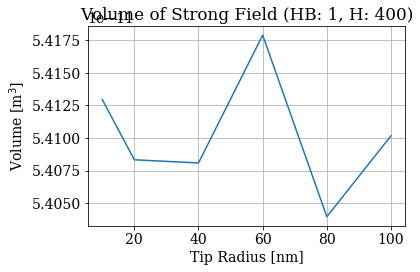

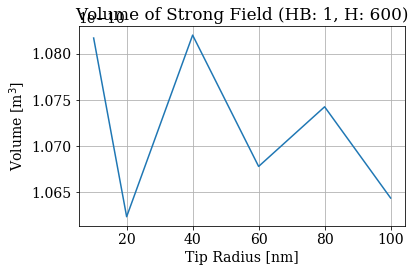

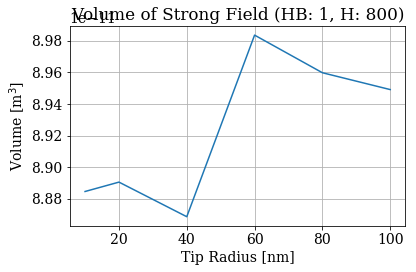

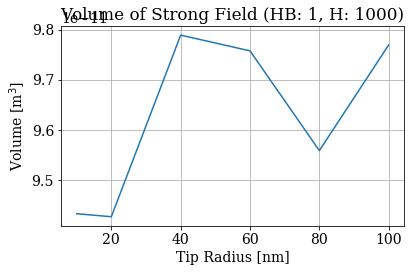

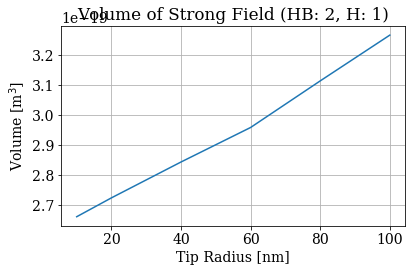

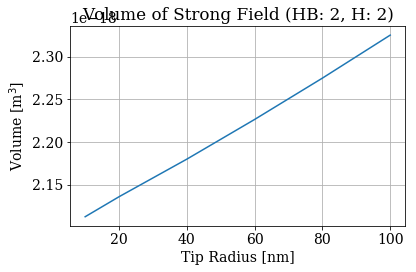

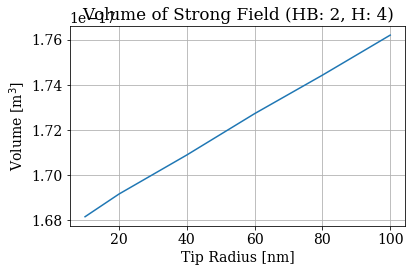

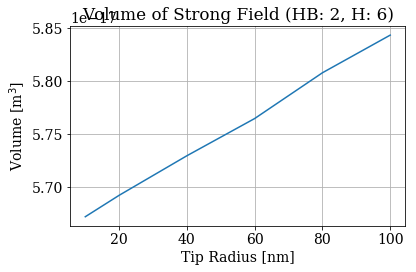

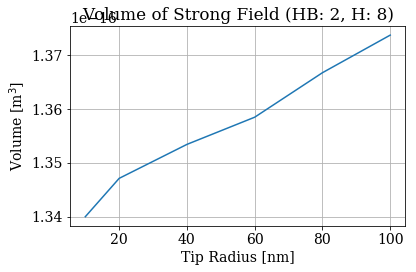

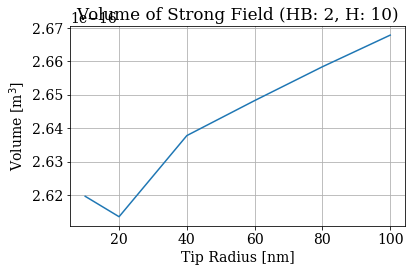

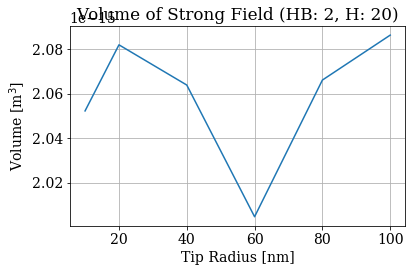

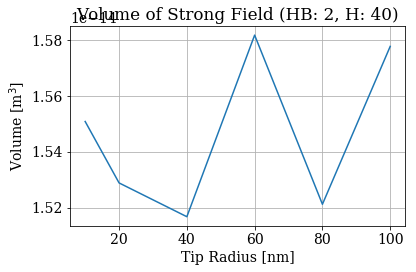

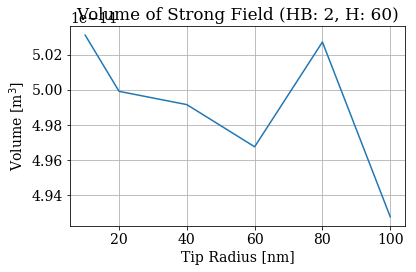

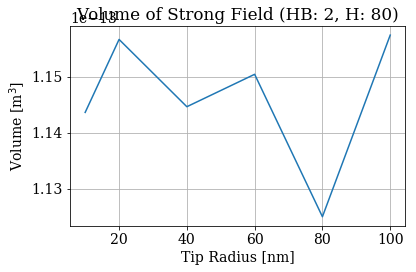

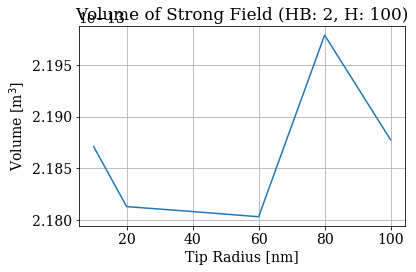

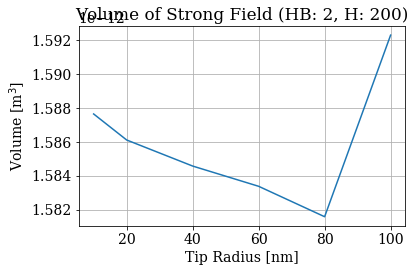

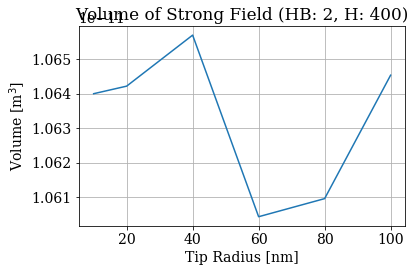

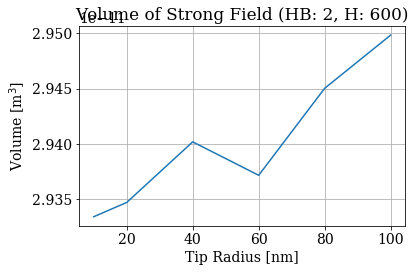

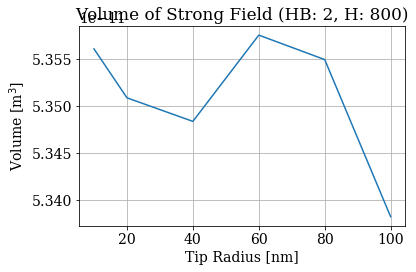

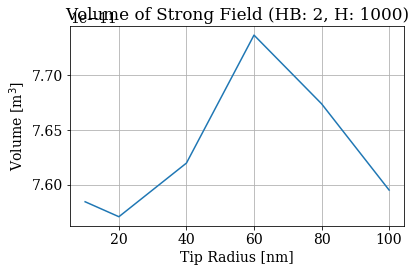

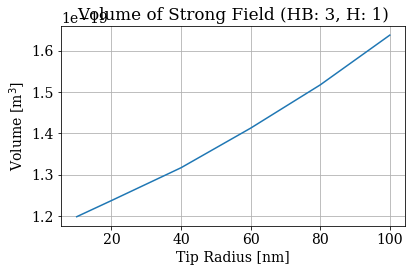

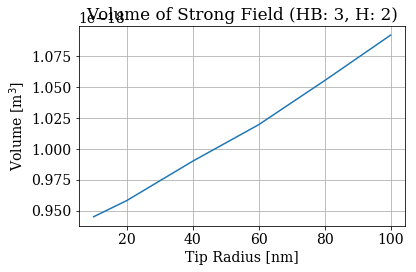

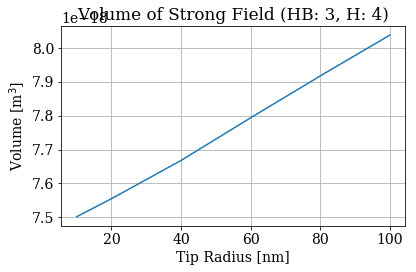

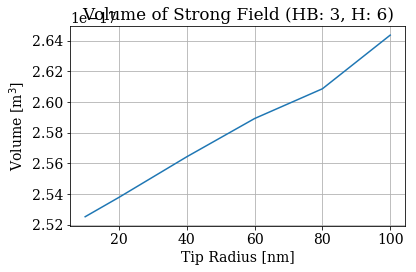

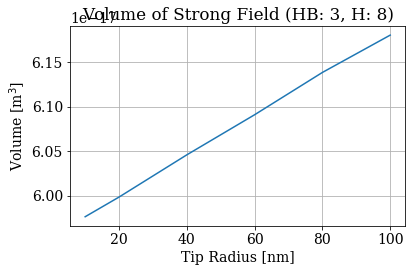

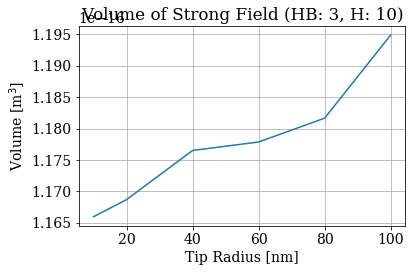

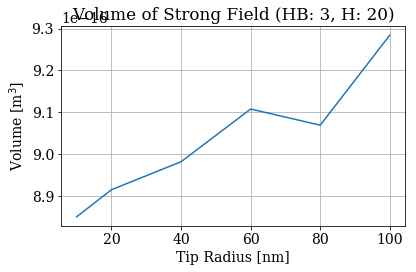

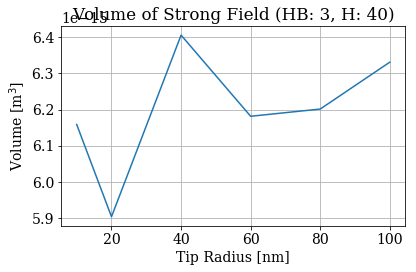

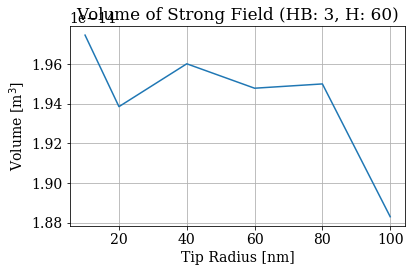

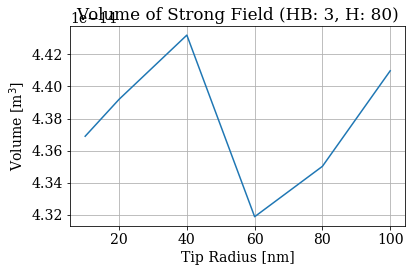

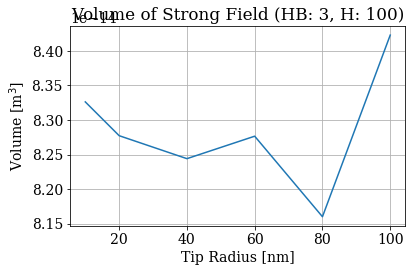

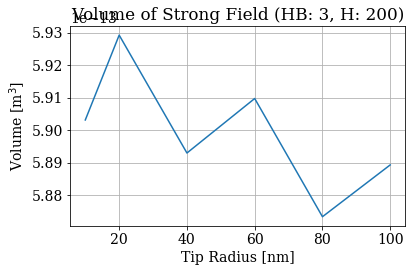

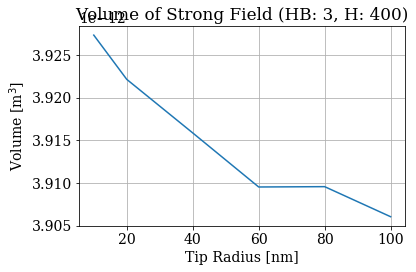

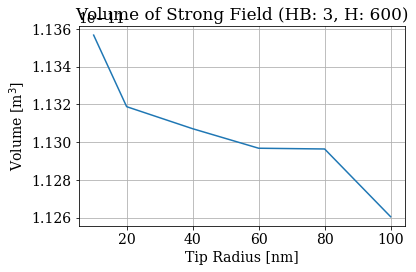

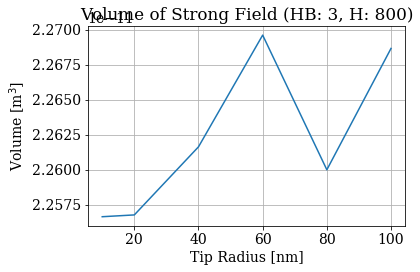

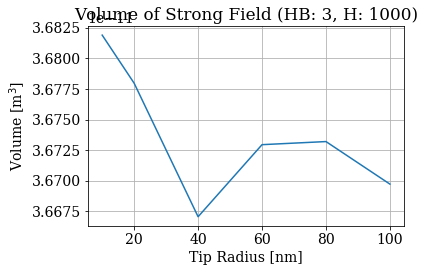

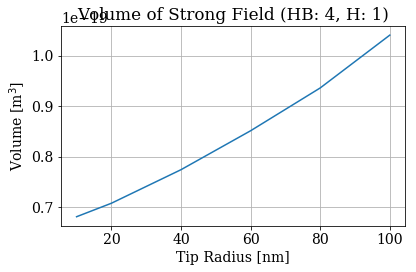

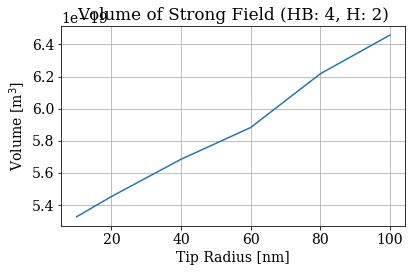

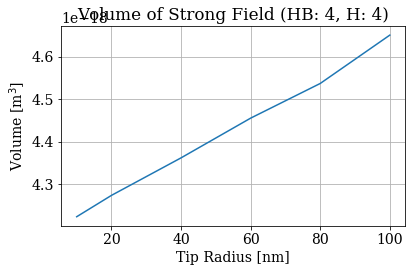

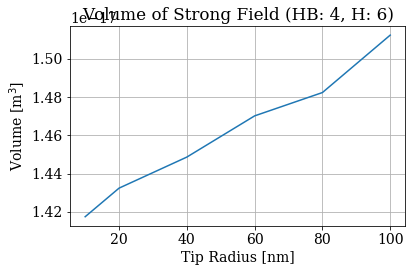

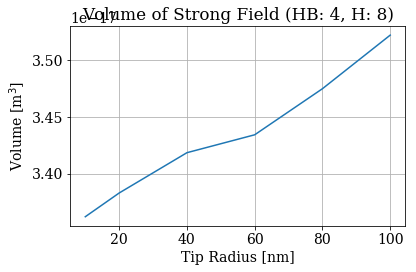

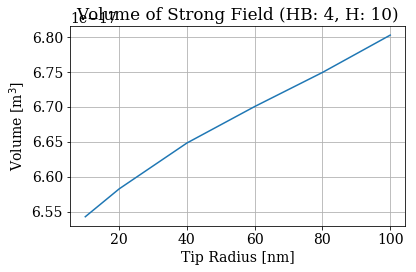

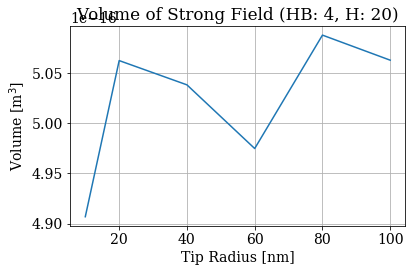

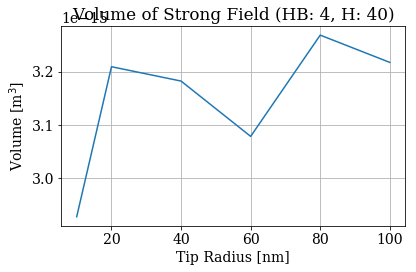

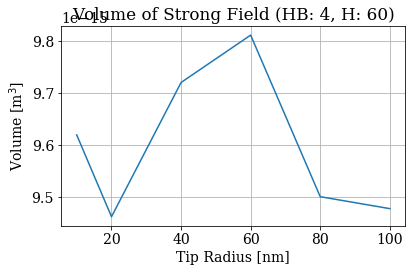

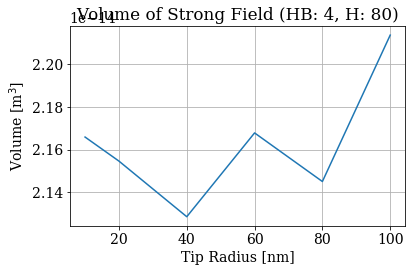

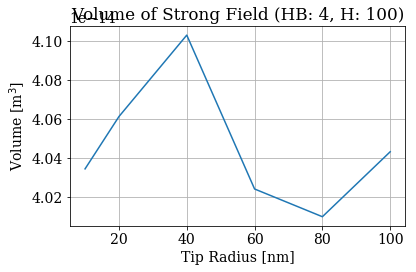

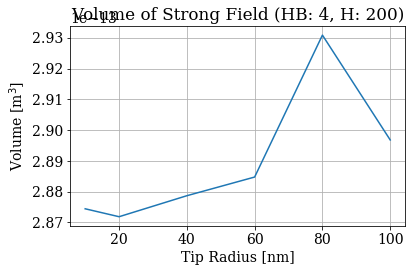

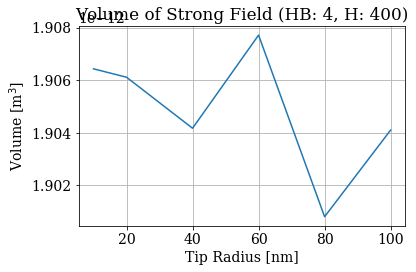

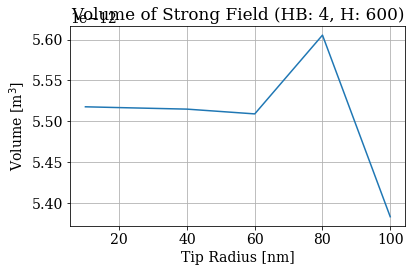

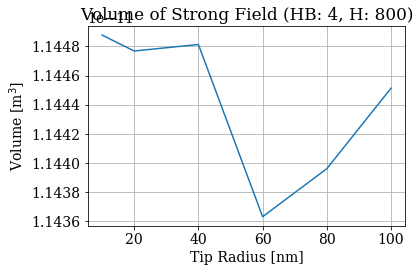

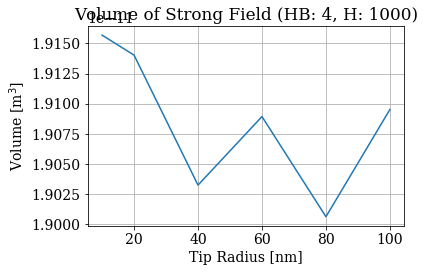

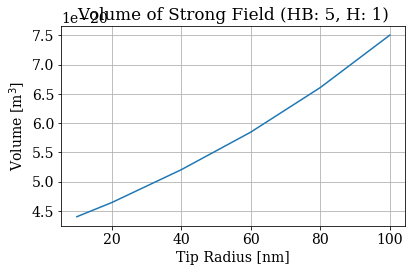

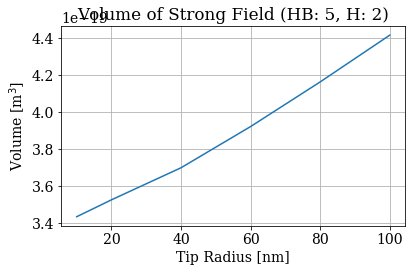

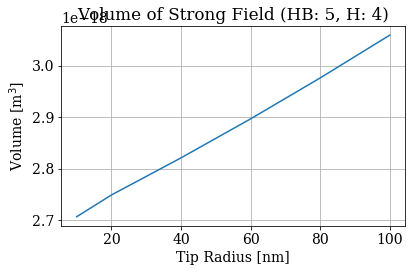

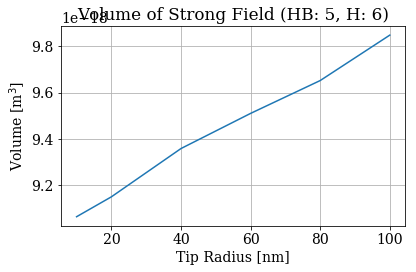

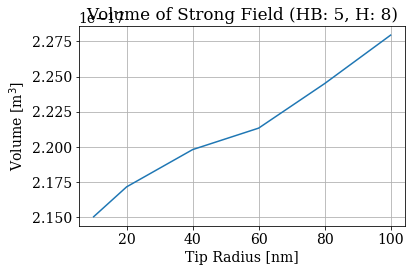

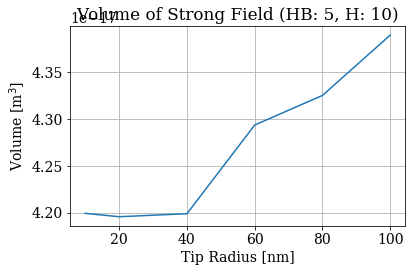

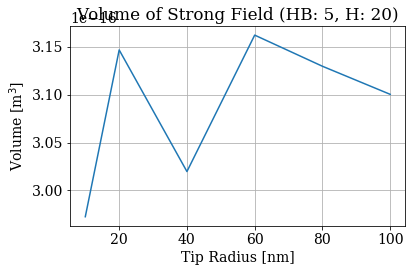

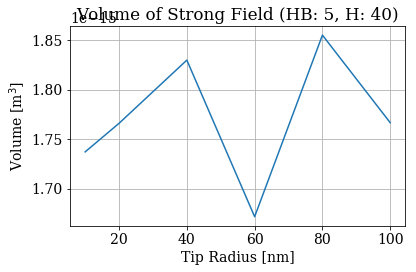

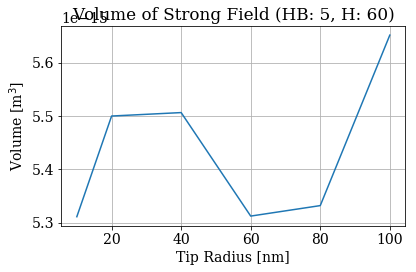

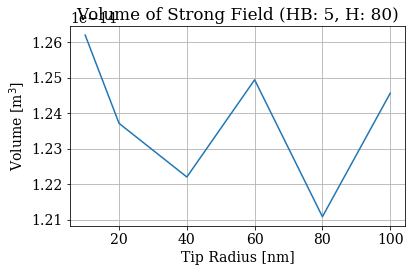

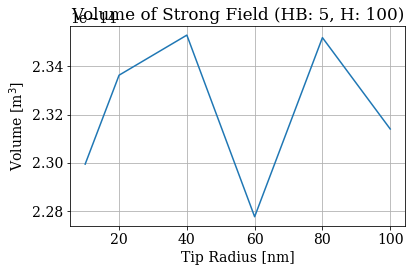

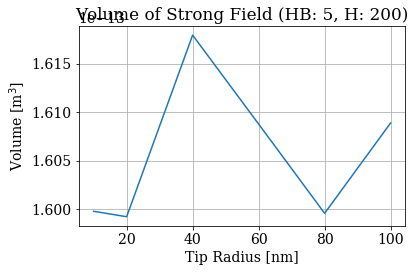

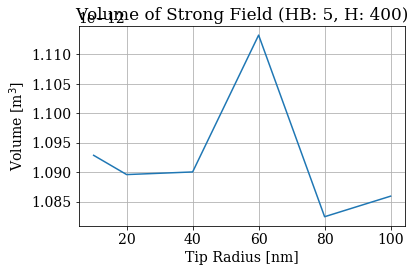

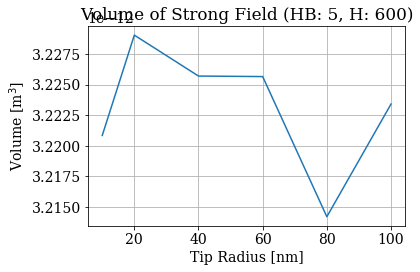

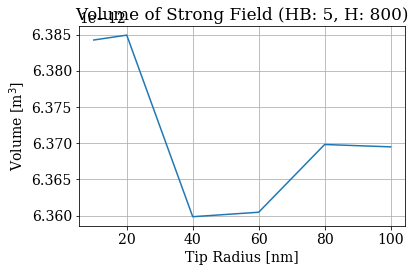

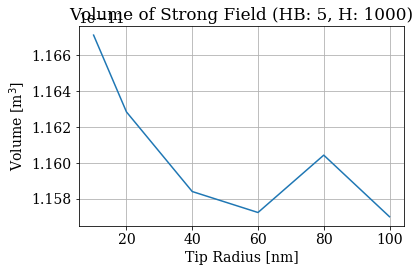

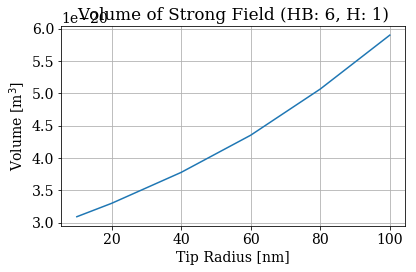

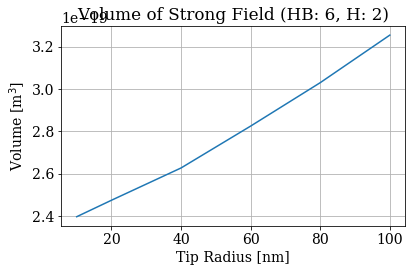

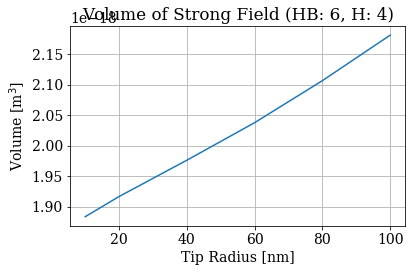

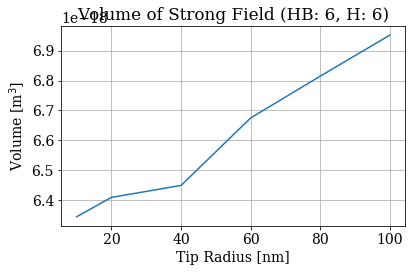

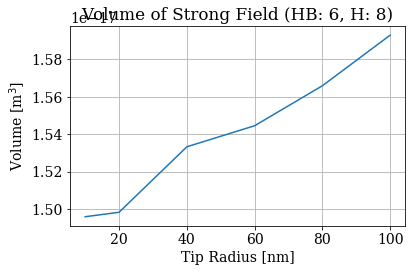

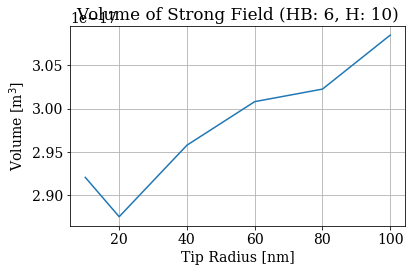

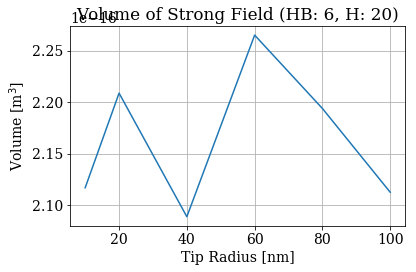

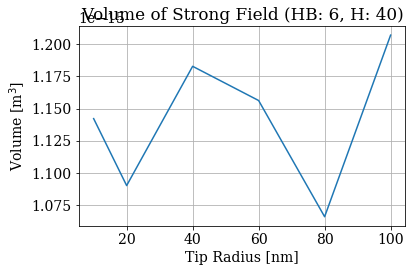

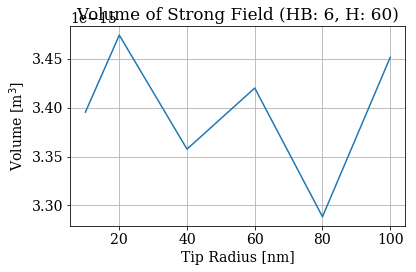

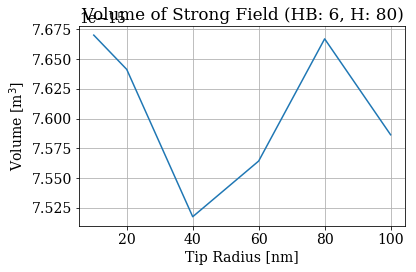

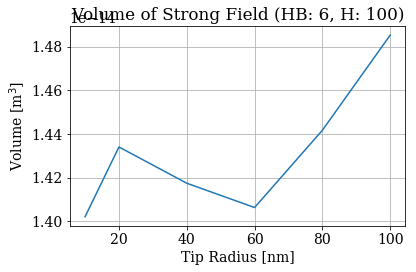

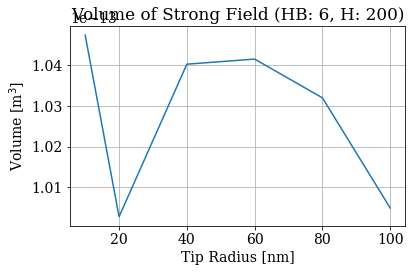

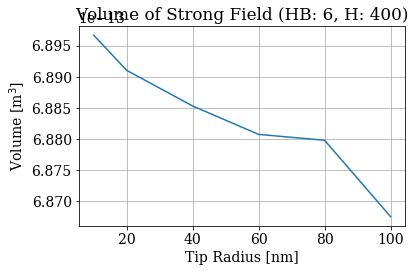

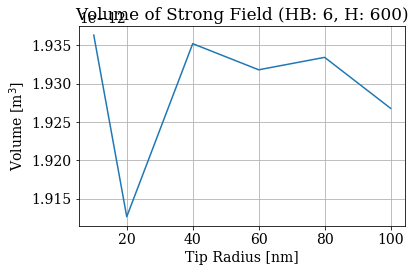

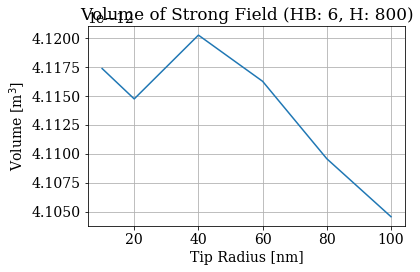

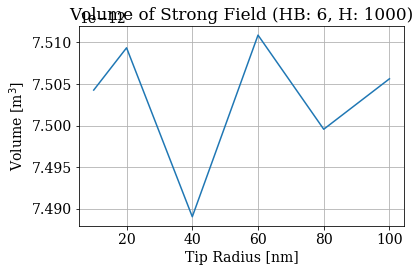

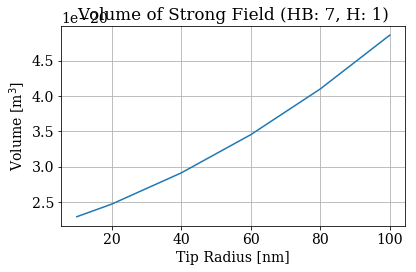

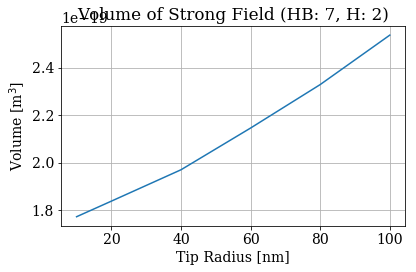

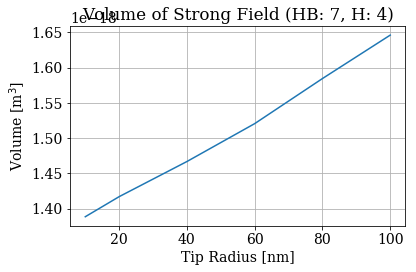

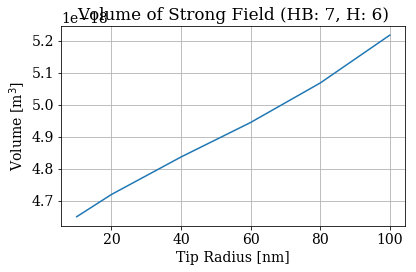

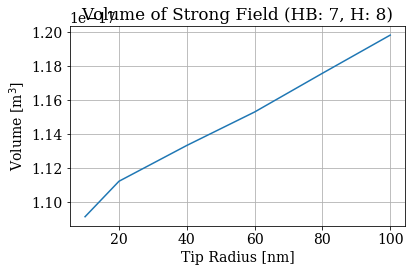

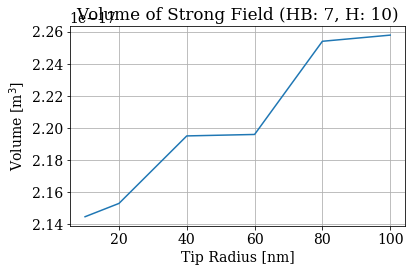

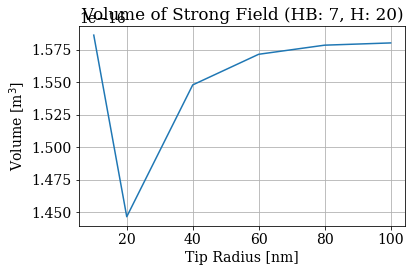

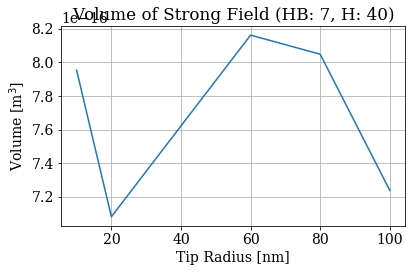

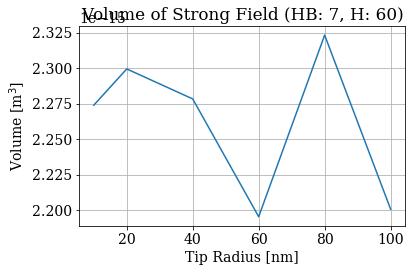

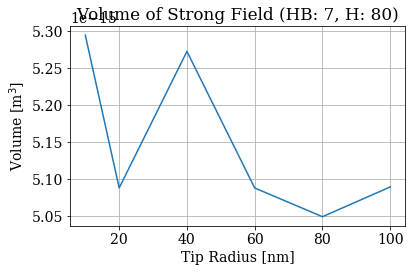

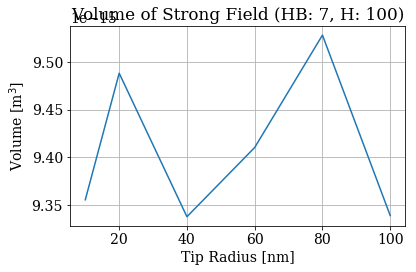

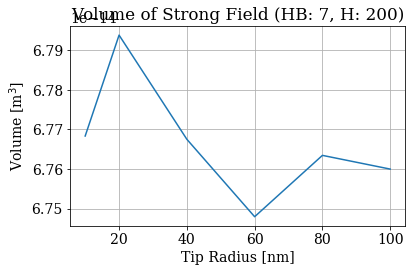

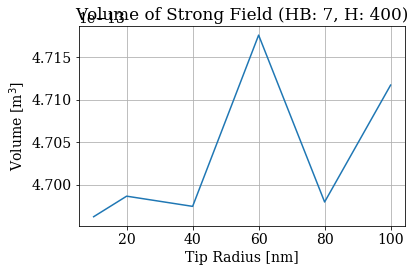

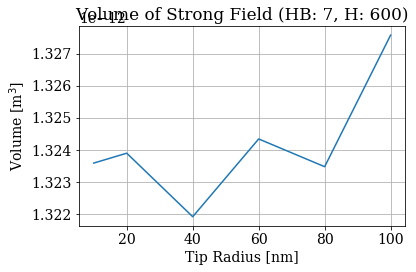

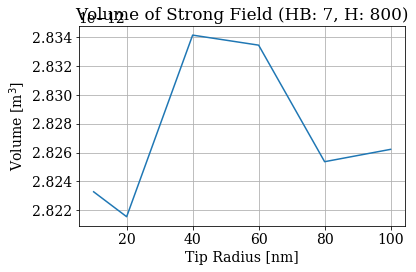

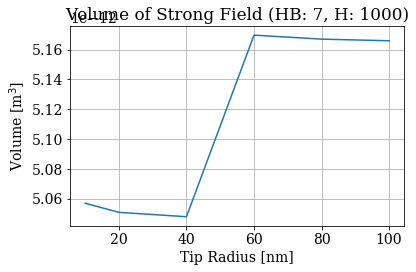

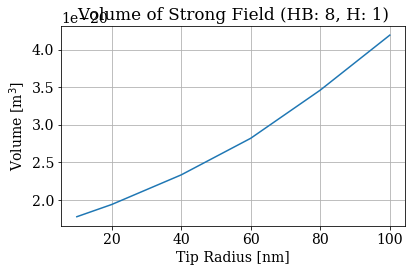

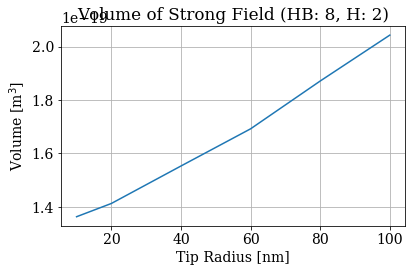

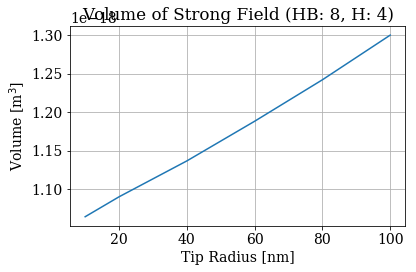

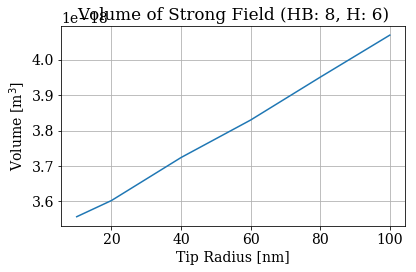

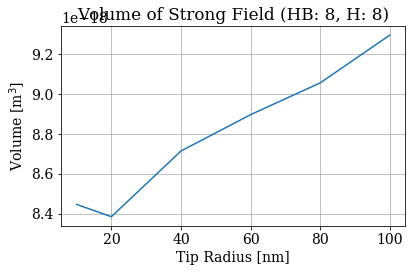

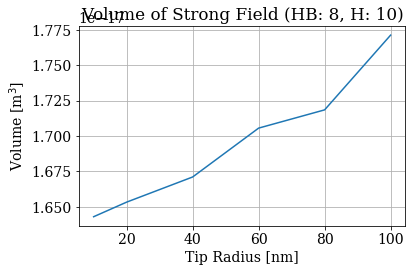

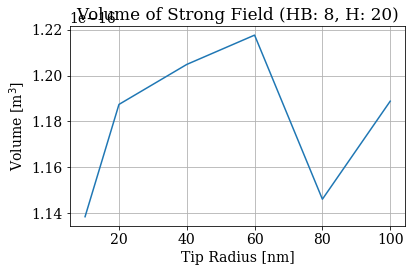

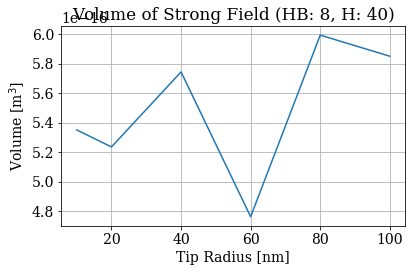

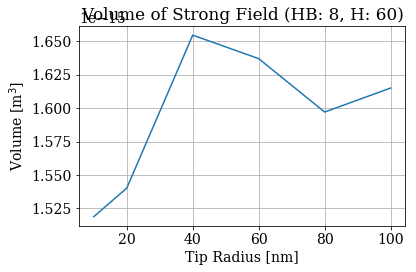

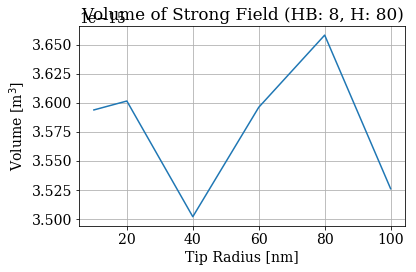

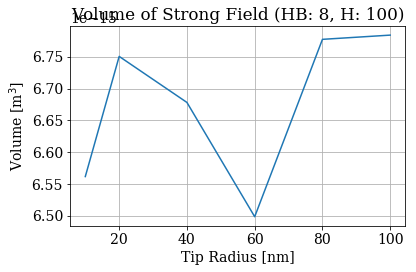

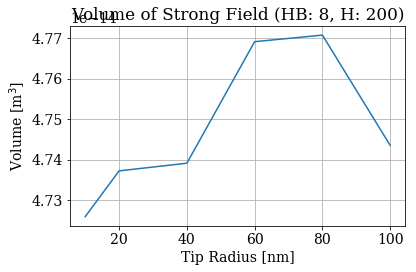

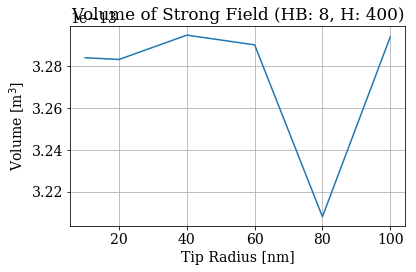

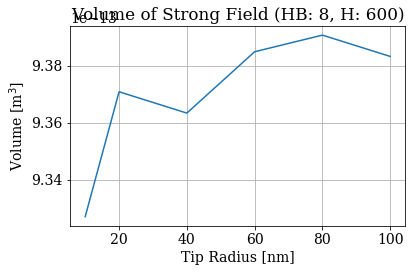

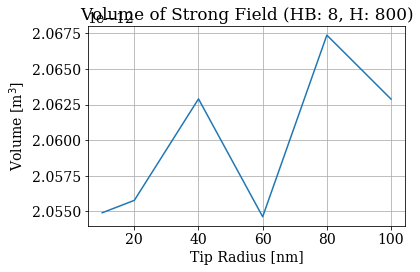

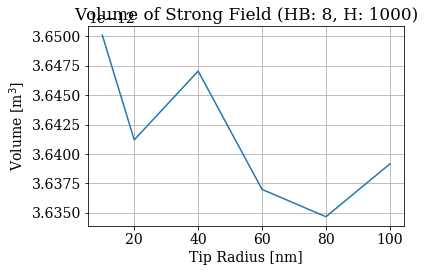

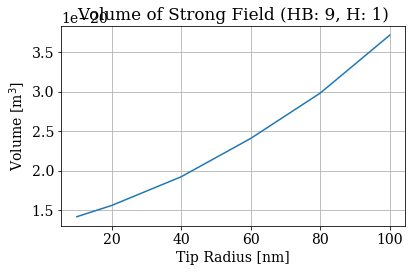

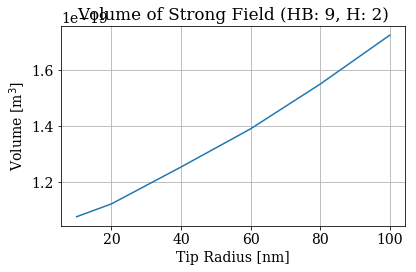

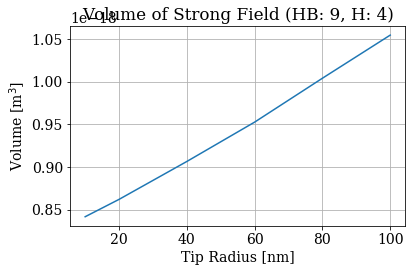

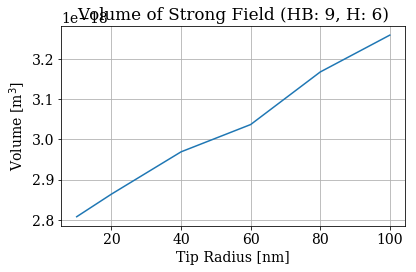

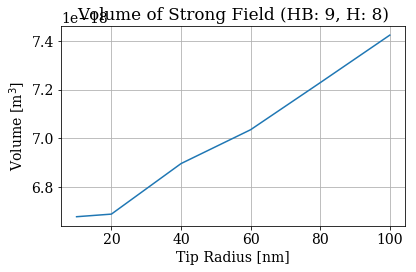

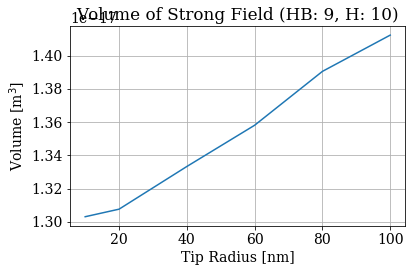

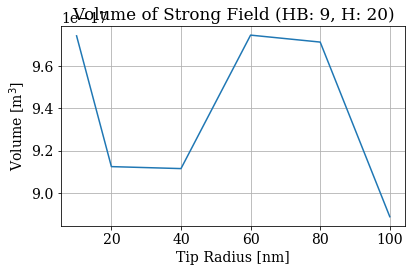

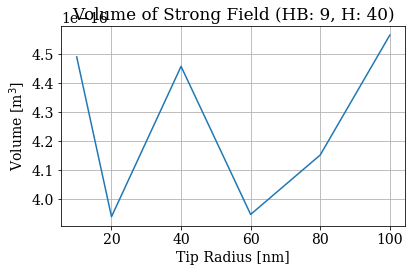

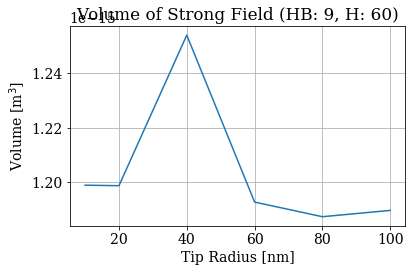

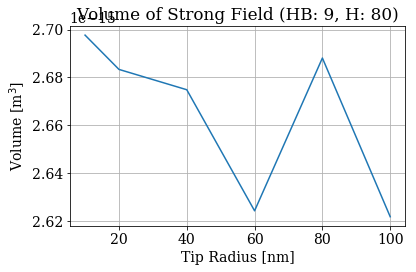

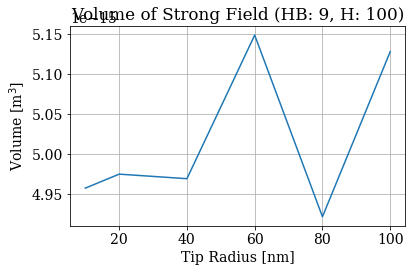

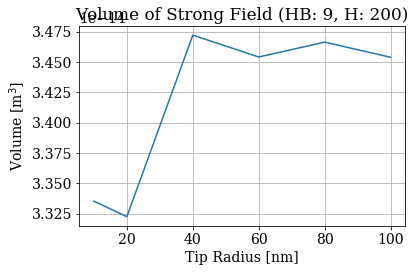

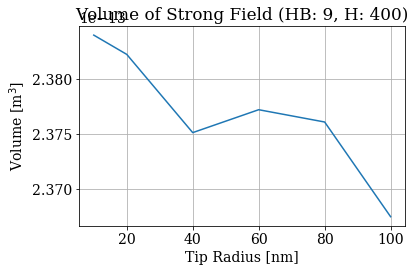

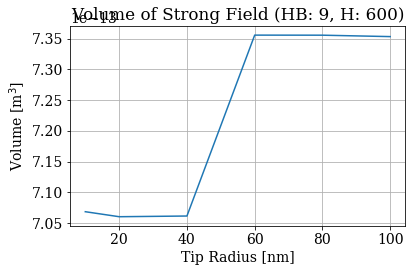

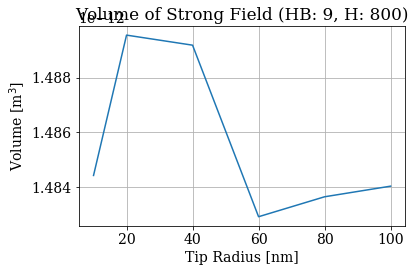

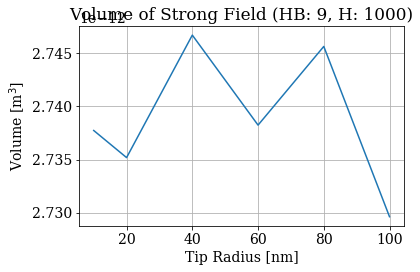

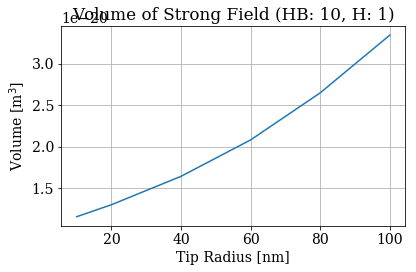

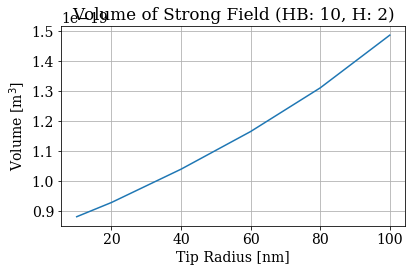

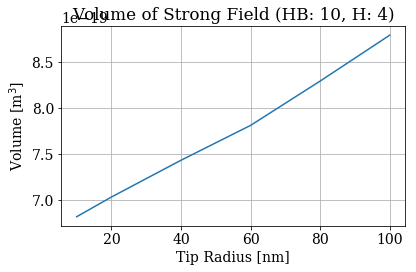

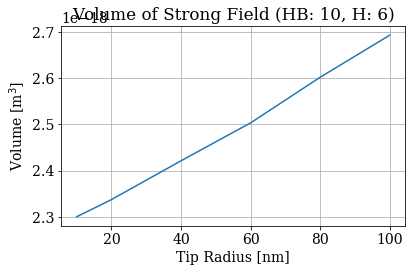

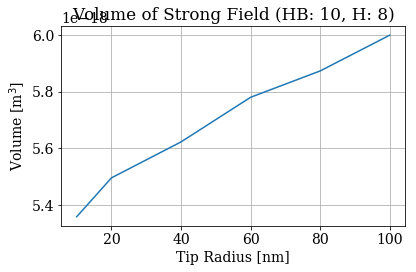

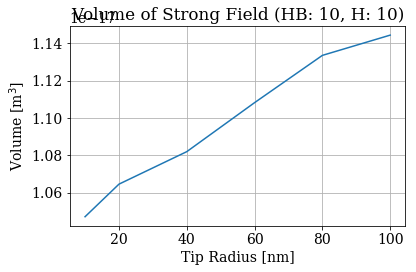

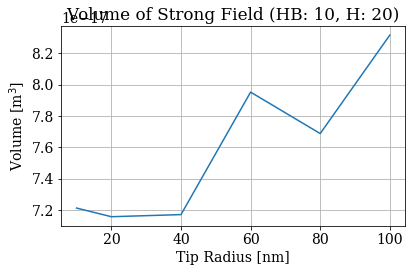

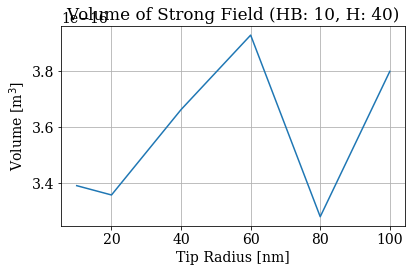

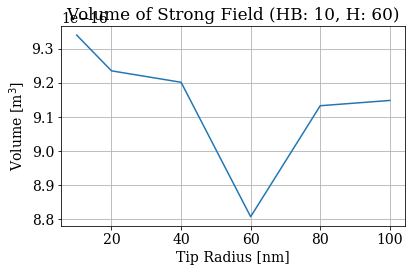

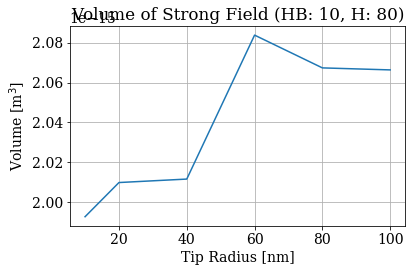

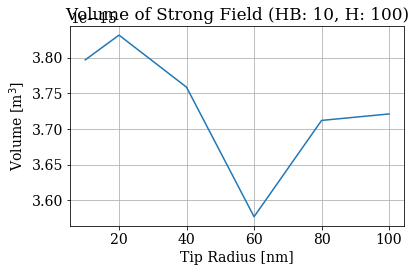

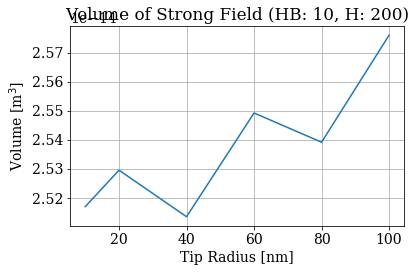

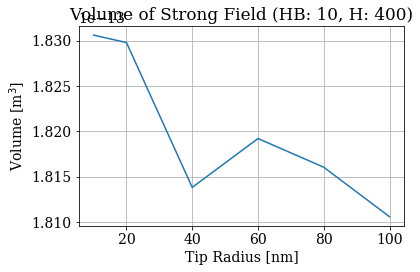

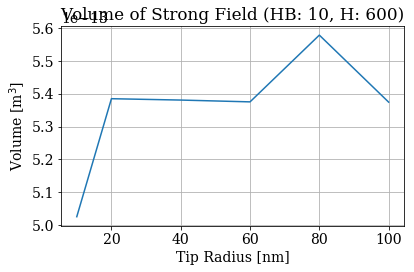

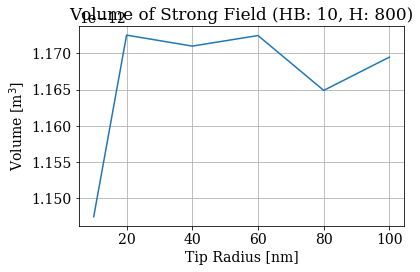

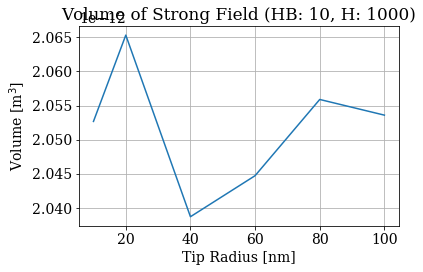

In [98]:
# plt.rcParams['font.size'] = 14
# plt.rcParams['font.family'] = 'serif'
# fig = plt.figure(figsize=(6, 5))

# plt.rcParams['font.size'] = 20
# plt.rcParams['font.sans-serif'] = ['Arial']
# fig = plt.figure(figsize=(8, 6))

height, tip_radius, hb_ratio, vol = np.loadtxt('tip-height-slope/max_field_vols.txt', unpack=True)

height = np.array([int(round(k)) for k in height])
tip_radius = np.array([int(round(k)) for k in tip_radius])
hb_ratio = np.array([int(round(k)) for k in hb_ratio])

for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    for j in [1, 2, 4, 6, 8, 10, 20, 40, 60, 80, 100, 200, 400, 600, 800, 1000]:
        this_hb_ratio = i
        this_tip_height = j # um

        indices_of_fixed_hb_ratio = np.where(hb_ratio == this_hb_ratio)

        heights_at_fixed_hb_ratio = height[indices_of_fixed_hb_ratio]
        tip_radii_at_fixed_hb_ratio = tip_radius[indices_of_fixed_hb_ratio]
        vols_at_fixed_hb_ratio = vol[indices_of_fixed_hb_ratio]

        indices_of_fixed_tip_height = np.where(heights_at_fixed_hb_ratio == this_tip_height)[0]

        final_radii = tip_radii_at_fixed_hb_ratio[indices_of_fixed_tip_height]
        final_vols = np.array(vols_at_fixed_hb_ratio[indices_of_fixed_tip_height])

        plt.plot(final_radii, final_vols)

        plt.xlabel('Tip Radius [nm]')
        plt.ylabel('Volume [m$^3$]')
        plt.title(f'Volume of Strong Field (HB: {this_hb_ratio}, H: {this_tip_height})')

        plt.grid()
        plt.tight_layout()
        plt.show()

        # plt.savefig('tip_radius_vs_vol.pdf', bbox_inches='tight')